<a href="https://colab.research.google.com/github/suyogwaghmode/EDA-on-air-pollutant-PM2.5-data-in-the-New-York-city/blob/main/EDA_on_air_pollutant_(PM2_5)_data_in_the_New_York_city.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA of air pollutant (PM 2.5) in the New York City (2022)

**Aim of study**: To do an exploratory data analysis on particulate matter (PM 2.5) data in the New York city

**Dataset:**

AirNow data provided on [EPA](https://www.epa.gov/)

**Key Metrics To Check:** 

1.   Sites with highest/lowest PM2.5 concentraion
2.   Months with highest/lowest PM2.5 concentrations 

**Tools Used**: 
Jupyter Notebook for Python

Libraries: Pandas, NumPy, Matplotlib, and Seaborn

In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#mounting google drive for data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading csv file
df = pd.read_csv("/content/drive/MyDrive/DATA/ad_viz_plotval_data.csv",index_col = 'Date',parse_dates=True)
df.head()

,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
Date,,,,,,,,,,,,,,,,,,,
2022-01-01,AQS,340030010,3,8.0,ug/m3 LC,33,Fort Lee Near Road,1,100.0,88101,PM2.5 - Local Conditions,35620,"New York-Newark-Jersey City, NY-NJ-PA",34,New Jersey,3,Bergen,40.85355,-73.96618
2022-01-02,AQS,340030010,3,3.4,ug/m3 LC,14,Fort Lee Near Road,1,100.0,88101,PM2.5 - Local Conditions,35620,"New York-Newark-Jersey City, NY-NJ-PA",34,New Jersey,3,Bergen,40.85355,-73.96618
2022-01-03,AQS,340030010,3,1.8,ug/m3 LC,8,Fort Lee Near Road,1,100.0,88101,PM2.5 - Local Conditions,35620,"New York-Newark-Jersey City, NY-NJ-PA",34,New Jersey,3,Bergen,40.85355,-73.96618
2022-01-04,AQS,340030010,3,4.3,ug/m3 LC,18,Fort Lee Near Road,1,100.0,88101,PM2.5 - Local Conditions,35620,"New York-Newark-Jersey City, NY-NJ-PA",34,New Jersey,3,Bergen,40.85355,-73.96618
2022-01-05,AQS,340030010,3,8.7,ug/m3 LC,36,Fort Lee Near Road,1,100.0,88101,PM2.5 - Local Conditions,35620,"New York-Newark-Jersey City, NY-NJ-PA",34,New Jersey,3,Bergen,40.85355,-73.96618


In [ ]:
df.shape

(10284, 19)

There are to total 10284 rows and 20 columns

In [ ]:
#there are multiple columns which are not needed in this
df.columns

Index(['Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration', 'UNITS',
       'DAILY_AQI_VALUE', 'Site Name', 'DAILY_OBS_COUNT', 'PERCENT_COMPLETE',
       'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME',
       'STATE_CODE', 'STATE', 'COUNTY_CODE', 'COUNTY', 'SITE_LATITUDE',
       'SITE_LONGITUDE'],
      dtype='object')

In [ ]:
#droping the columns
df2 = df.drop(columns=['Source', 'POC', 'Site ID',
       'UNITS', 'DAILY_OBS_COUNT',
       'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC',
       'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'COUNTY_CODE',
       'COUNTY', 'SITE_LATITUDE', 'SITE_LONGITUDE','DAILY_AQI_VALUE'])
df2.head()

,Daily Mean PM2.5 Concentration,Site Name,STATE
Date,,,
2022-01-01,8.0,Fort Lee Near Road,New Jersey
2022-01-02,3.4,Fort Lee Near Road,New Jersey
2022-01-03,1.8,Fort Lee Near Road,New Jersey
2022-01-04,4.3,Fort Lee Near Road,New Jersey
2022-01-05,8.7,Fort Lee Near Road,New Jersey


In [ ]:
df2.nunique() #distinct values in each column

Daily Mean PM2.5 Concentration    255
Site Name                          31
STATE                               2
dtype: int64

<AxesSubplot:xlabel='Date'>

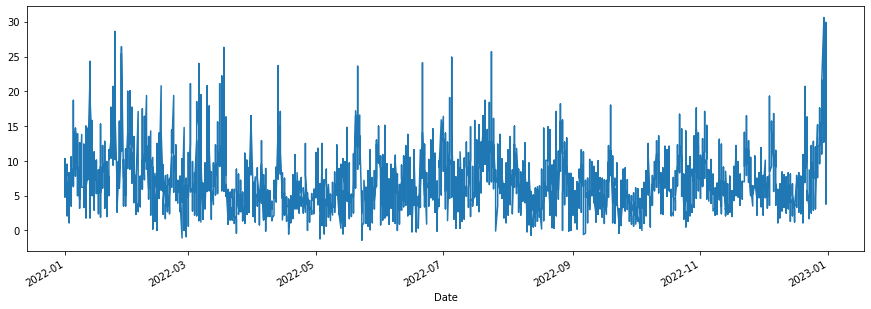

In [ ]:
#plotting the daily mean PM2.5 concentration wrt time
df2['Daily Mean PM2.5 Concentration'].plot(figsize=(15,5))

In [ ]:
#Max value of PM2.5 throughout the year
df2['Daily Mean PM2.5 Concentration'].max()

30.6

In [ ]:

df2['Daily Mean PM2.5 Concentration'].sort_values(ascending=False)

Date
2022-12-30    30.6
2022-12-30    30.1
2022-12-31    29.9
2022-12-30    29.9
2022-01-25    28.6
              ... 
2022-02-26    -1.1
2022-05-03    -1.2
2022-05-23    -1.2
2022-05-23    -1.2
2022-05-23    -1.4
Name: Daily Mean PM2.5 Concentration, Length: 10284, dtype: float64

In [ ]:
#resampling the daily data into monthly data 
df3=df2.resample('M').median()

In [ ]:
#sorting the values from highest to lowest PM2.5 concentrations
df3['Daily Mean PM2.5 Concentration'].sort_values(ascending=False)

Date
2022-07-31    8.6
2022-01-31    8.5
2022-02-28    6.9
2022-12-31    6.6
2022-08-31    6.2
2022-11-30    6.2
2022-03-31    6.1
2022-06-30    5.9
2022-10-31    5.9
2022-05-31    5.3
2022-09-30    4.8
2022-04-30    4.1
Name: Daily Mean PM2.5 Concentration, dtype: float64

In [ ]:
# Which month had highest median values of PM2.5
df3['Daily Mean PM2.5 Concentration'].sort_values(ascending=False).head(1)

Date
2022-07-31    8.6
Name: Daily Mean PM2.5 Concentration, dtype: float64

In [ ]:
# Which month had lowest values of PM2.5
df3['Daily Mean PM2.5 Concentration'].sort_values(ascending=True).head(1)

Date
2022-04-30    4.1
Name: Daily Mean PM2.5 Concentration, dtype: float64

In [ ]:
df2

,Daily Mean PM2.5 Concentration,Site Name,STATE
Date,,,
2022-01-01,8.0,Fort Lee Near Road,New Jersey
2022-01-02,3.4,Fort Lee Near Road,New Jersey
2022-01-03,1.8,Fort Lee Near Road,New Jersey
2022-01-04,4.3,Fort Lee Near Road,New Jersey
2022-01-05,8.7,Fort Lee Near Road,New Jersey
...,...,...,...
2022-12-27,9.3,WHITE PLAINS,New York
2022-12-28,12.9,WHITE PLAINS,New York
2022-12-29,15.5,WHITE PLAINS,New York


In [ ]:
#grouping the data by Site Names
df4 = df2.groupby('Site Name').median()
df4.head(10)

,Daily Mean PM2.5 Concentration
Site Name,
BABYLON,5.55
CCNY,5.30
Chester,4.85
EISENHOWER PARK,5.30
Elizabeth Lab,8.30
FRESHKILLS WEST,5.20
Flemington,6.30
Fort Lee Near Road,6.10
HOLTSVILLE,4.80


In [ ]:
#Sorting the data wrt PM2.5 to find out which Site had highest PM2.5 concentation throughout the year 
df4.sort_values(by = 'Daily Mean PM2.5 Concentration',ascending=False).head(1)

,Daily Mean PM2.5 Concentration
Site Name,
Elizabeth Lab,8.3


In [ ]:
#lowest PM2.5 concentration
df4.sort_values(by = 'Daily Mean PM2.5 Concentration',ascending=True).head(1)

,Daily Mean PM2.5 Concentration
Site Name,
Rockland County,4.25


In [ ]:
#grouping the data wrt State
df5 = df2.groupby('STATE').median()
df5.head(10)

,Daily Mean PM2.5 Concentration
STATE,
New Jersey,6.6
New York,5.9


<AxesSubplot:xlabel='STATE'>

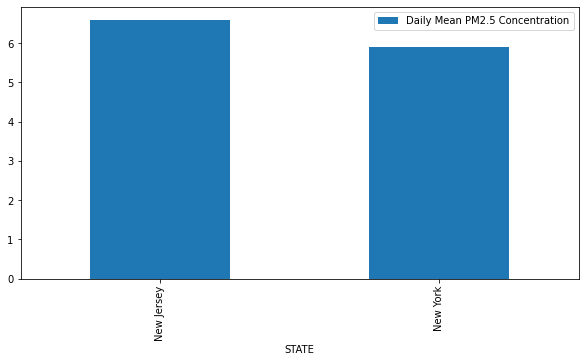

In [ ]:
df5.plot(kind="bar",figsize=(10,5))

<AxesSubplot:xlabel='Site Name'>

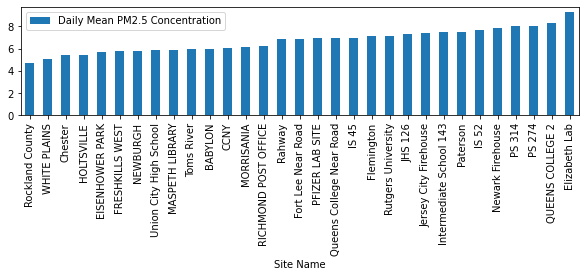

In [ ]:
#plotting the data wrt site names
df2.groupby('Site Name').mean().sort_values(by = 'Daily Mean PM2.5 Concentration',ascending=True).plot(kind='bar',figsize=(10,2))

Elizabeth Lab had highest average PM2.5 concentration throughout year.

Rockland County had lowest average PM2.5 concentration throughout year.

In [ ]:
#going deeper into Elizabeth Lab data
df6=df2.loc[df2['Site Name']=='Elizabeth Lab'].sort_values(by='Daily Mean PM2.5 Concentration',ascending=False)

In [ ]:
#df6 is Elizabeth Lab data
df6

,Daily Mean PM2.5 Concentration,Site Name,STATE
Date,,,
2022-12-30,26.1,Elizabeth Lab,New Jersey
2022-01-28,24.7,Elizabeth Lab,New Jersey
2022-04-13,23.7,Elizabeth Lab,New Jersey
2022-01-28,23.3,Elizabeth Lab,New Jersey
2022-01-13,23.2,Elizabeth Lab,New Jersey
...,...,...,...
2022-12-16,3.0,Elizabeth Lab,New Jersey
2022-03-27,3.0,Elizabeth Lab,New Jersey
2022-04-28,2.9,Elizabeth Lab,New Jersey


<AxesSubplot:xlabel='Date'>

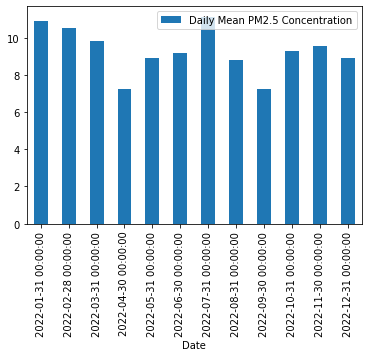

In [ ]:
df6.resample("M").mean().plot(kind="bar")

<AxesSubplot:xlabel='Date'>

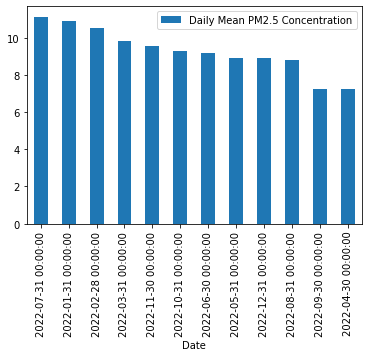

In [ ]:
df6.resample("M").mean().sort_values(by='Daily Mean PM2.5 Concentration',ascending=False).plot(kind="bar")